In [49]:
import torch
import PIL
from torchvision.transforms import ToPILImage
from datasets import load_dataset
import matplotlib.pyplot as plt
import torch.nn.functional as nnf

In [3]:
imagenet_dino = load_dataset("danjacobellis/imagenet_dino",split='validation').with_format("torch")

Resolving data files:   0%|          | 0/41 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/41 [00:00<?, ?it/s]

In [4]:
imagenet = load_dataset("imagenet-1k",split='validation')

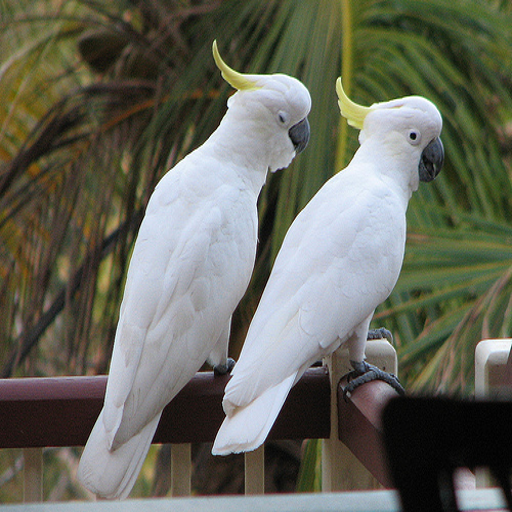

In [38]:
imagenet[10]['image'].resize((512,512))

In [31]:
x = imagenet_dino[10]['patch_tokens'].reshape((1,16,16,1536)).permute((0,3,1,2))

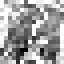

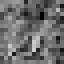

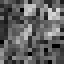

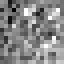

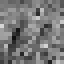

In [41]:
for c in range(5):
    z = x[0,c,:,:]
    z = z.clamp(-3,3)
    z = z/6 + 0.5
    z = (255*z).round().to(torch.uint8)
    display(ToPILImage()(z).resize((64,64),PIL.Image.NEAREST))

In [42]:
import torch
import torch.nn as nn

class LinearSegmentationHead(nn.Module):
    def __init__(self, in_channels=1536, num_classes=150):
        super(LinearSegmentationHead, self).__init__()
        self.conv_seg = nn.Conv2d(in_channels, num_classes, kernel_size=1)
        self.bn = nn.BatchNorm2d(in_channels)

    def forward(self, x):
        x = self.bn(x)
        x = self.conv_seg(x)
        return x


In [43]:
checkpoint = torch.load("dinov2_vitg14_ade20k_linear_head.pth")
new_state_dict = {key.replace("decode_head.", ""): value for key, value in checkpoint['state_dict'].items()}
model = LinearSegmentationHead()
model.load_state_dict(new_state_dict)

<All keys matched successfully>

In [135]:
x.shape

torch.Size([1, 1536, 16, 16])

In [86]:
y = nnf.interpolate(x, size=(512, 512), mode='bicubic', align_corners=False)

In [131]:
z = model(y).argmax(dim=1)

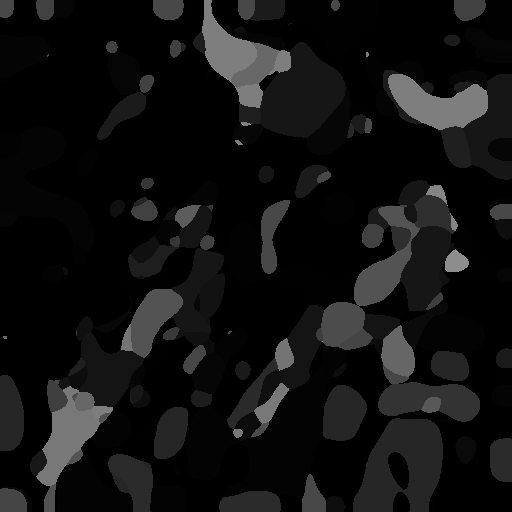

In [134]:
ToPILImage()(z[0].to(torch.uint8))